1


C:\Users\eejmws\AppData\Local\Temp\ipykernel_28268\4211497147.py:227: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(spalledwall[locx+overlapxstart:locx+overlapxstart+defectlength,locy+overlapystart:locy+defectheight+overlapystart])


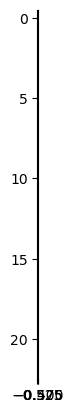

In [1]:


from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import albumentations as A
from skimage.io import imread
from scipy.special import binom
from skimage import feature
from skimage import segmentation
from skimage import morphology
from scipy import ndimage
import cv2 as cv
from scipy import ndimage
from skimage import segmentation
import random

testim = Image.open("test.tiff")
wallim = Image.open("wall.tiff")
#maskim = Image.open("wall.tiff")
wall = np.array(wallim)
#mask = np.array(maskim)
mask = wall>0.9
test = np.array(testim)
damagelevel = 0.5
plt.imshow(wall)

bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

def bezier(points, num=200):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve

class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 0.3)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)

    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)


def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve

def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]

def get_bezier_curve(a, rad=0.2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points. 
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a


def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)

    
    
rad = random.random()
edgy = random.random()*10
npoints = random.randint(3,15)
for c in np.array([[0,0]]):

    a = get_random_points(npoints, scale=1) + c
    x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)


x=(x*100).astype(int)
y=(y*100).astype(int)
# plt.plot(x,y)

spall = np.zeros((105,105))

for n in range(len(x)):
  a = min(x[n]+3,102)
  b = min(y[n]+3,102)
  spall[a,b]=1

spall=spall.astype(int)
cv.floodFill(spall, None, (0,0),1)
spall=1-spall
spallD = ndimage.distance_transform_edt(spall)    
plt    
    
    
    
    

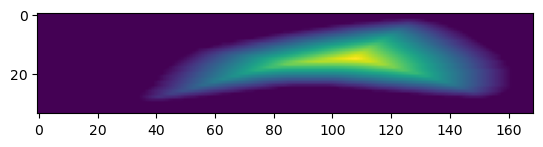

In [2]:
plt.imshow(spallC)

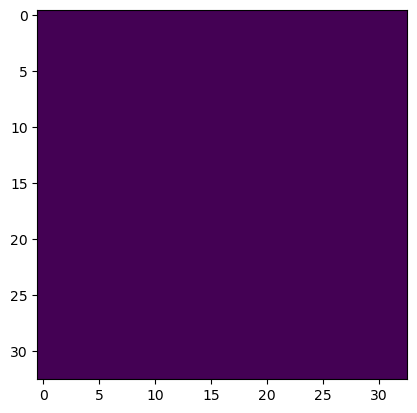

In [3]:
plt.imshow(spallflatC)

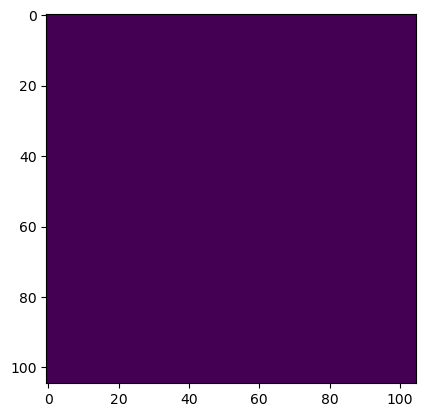

In [4]:
plt.imshow(spallflatb)


In [5]:
spallflatb.max()

0

In [6]:
spallflatC.max()

0

In [7]:
spallflat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
spallflatsize

33

In [9]:
flatlocy

13

In [10]:
flatlocx

18

In [12]:
spalledwall

array([[1.        , 0.5379438 , 0.15567206, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.5379438 , 0.15567206, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.5379438 , 0.15567206, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.5379438 , 0.15567206, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.5379438 , 0.15567206, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.5379438 , 0.15567206, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)